In [1]:
import wisps
import wisps.simulations as wispsim
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

Adding 145 sources from /Users/caganze/research/splat//resources/Spectra/Public/LRIS-RED/ to spectral database
Adding 89 sources from /Users/caganze/research/splat//resources/Spectra/Public/MAGE/ to spectral database
Adding 2404 sources from /Users/caganze/research/splat//resources/Spectra/Public/SPEX-PRISM/ to spectral database


In [2]:
pnts=pd.read_pickle(wisps.OUTPUT_FILES+'/pointings_correctedf110.pkl')

In [3]:
wisps.drop_nan((pnts[0]).mags['F110'])

array([], dtype=float64)

In [4]:
madf=pd.DataFrame.from_records([x.mag_limits for x in pnts])
madf['survey']=[x.survey for x in pnts]
madf['snr1']=[np.nanmedian(np.log10(x.snr1)) for x in pnts]
madf['exp']=[np.nanmedian(x.exposure_times) for x in pnts]

In [5]:
mags=pd.DataFrame.from_records([x.mags for x in pnts])
mags['exp']=[x.exposure_times.mean() for x in pnts]
mags['survey']=[x.survey for x in pnts]

In [6]:
hmags=mags.F140[np.logical_and(mags.exp.between(4000, 5000), mags.survey=='wisps')].values.flatten()
wmags=mags.F140[np.logical_and(mags.exp.between(4000, 5000), mags.survey=='hst3d')].values.flatten()

findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.


22.566082675926566
21.721


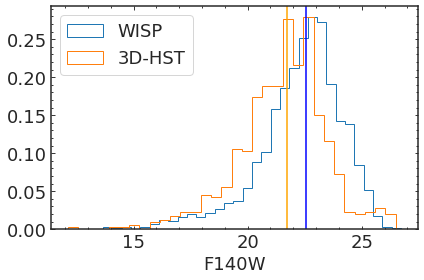

In [7]:
h=plt.hist(wisps.drop_nan(np.hstack(wmags).astype(float)), label='WISP', bins=32, density=True, histtype='step')
h=plt.hist(wisps.drop_nan(np.hstack(hmags).astype(float)),label='3D-HST', bins=32, density=True,histtype='step')

plt.xlabel('F140W')
plt.axvline(np.nanmedian(np.hstack(wmags).astype(float)), c='blue')
plt.axvline(np.nanmedian(np.hstack(hmags).astype(float)), c='orange')

print (np.nanmedian(np.hstack(wmags).astype(float)))
print (np.nanmedian(np.hstack(hmags).astype(float)))
plt.legend()
plt.tight_layout()
plt.minorticks_on()

In [8]:

def get_max_value(values):
    values=wisps.drop_nan(values)
    if len(values)<1:
        return np.nan
    if len(values)>=1:
        kernel = wisps.kernel_density(values)
        height = kernel.pdf(values)
        mode_value = values[np.argmax(height)]
        return height, float(mode_value)


In [9]:
p=np.random.choice(pnts)

m=wisps.drop_nan(p.mags['F140'])
ml=p.mag_limits['F140']
for p in pnts:
    #p=np.random.choice(pnts)
    fig, ax=plt.subplots(ncols=3, figsize=(14,4))
    for k, a in zip(['F110', 'F140', 'F160'], ax):
        m=wisps.drop_nan(p.mags[k])
        if len(m) < 50:
            pass
        else:
            ml=p.mag_limits[k]
            kde, mx= get_max_value(m)
            a.plot(m, kde, '.')
            h=a.hist(m, bins=32, histtype='step', density=True)
            a.axvline(ml, c='b')
            a.axvline(mx, c='k')
            a.set_title(p.name.upper() + ' '+ k.upper())
            a.minorticks_on()

            
        
    
   
  
        
      


<AxesSubplot:xlabel='exp', ylabel='F140'>

findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.


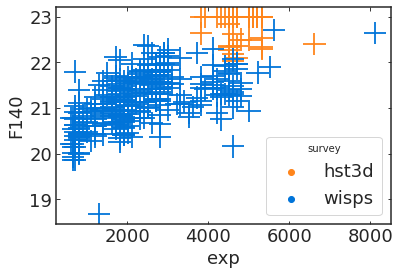

In [10]:
import seaborn as sns
sns.scatterplot(y='F140', x='exp', hue='survey', s=500., palette=['#FF851B', '#0074D9'], 
                data=madf, marker='+')
#plt.xlim([0.5, 1.5])

In [11]:
vbn

NameError: name 'vbn' is not defined

In [ ]:
bf= wisps.get_big_file()
stars=(bf[ bf.mstar_flag !=0]).reset_index(drop=True)

In [ ]:
dfs=[]
for idx in np.arange(80):
    #print (500+50*(idx-1), 500+50*idx)
    dfs.append(stars[(stars.exposure_time.apply(float).between(500+50*(idx-1), 500+50*idx)) & (~stars.F160.isna()) ])
#df1=stars[(stars.exposure_time.apply(float).between(2000, 4000)) & (~stars.F160.isna()) ]
#df2=stars[(stars.exposure_time.apply(float).between(4000, 6000)) & (~stars.F160.isna()) ]
#df3=stars[(stars.exposure_time.apply(float) > 3000) & (~stars.F160.isna())]

In [ ]:
dfs=[x for x in dfs if not x.empty]

In [ ]:
len(dfs)

In [ ]:
fig, ax=plt.subplots()


#ax.scatter(df1.F160, df1.F160_er, s=5., alpha=0.3)
#ax.scatter(df2.F160, df2.F160_er, s=5., alpha=0.3)
medians=[d.exposure_time.median() for d in dfs]
sns.set_palette('coolwarm')

df0=[x for x in dfs if x.exposure_time.median() <1500][0]
df1=[x for x in dfs if x.exposure_time.median() > 4000][0]

print (df0.exposure_time.median())
print (df1.exposure_time.median())

for idx in np.argsort(medians):
    #mask=np.logical_and(dfs[idx].F160 > 10, dfs[idx].F160 <30 )
    #print (len(dfs[idx].F160[mask]))
    _, p= wisps.fit_with_nsigma_clipping(dfs[idx].F160, np.log10(dfs[idx].F160_er/dfs[idx].F160),
                                         abs(np.log10(dfs[idx].F160_er/dfs[idx].F160)/10000.), 
                                         n=1, sigma=5)
    #print (p)
    ax.plot(np.arange(15, 40), p(np.arange(15, 40)))
#

#pol= np.poly1d(np.polyfit(dfs[idx].F160[mask], dfs[idx].F160_er[mask], 6))

#ax.scatter(df1.F160, np.log10(df1.F160_er/df1.F160),s=1, c='#FF4136', label='med {}'.format(df1.exposure_time.median()))
#ax.scatter(df0.F160, np.log10(df0.F160_er/df0.F160),s=1, c='#0074D9', label='med {}'.format(df0.exposure_time.median()))

#ax.plot(np.arange(15, 27), pol(np.arange(15, 27)))

plt.xlim(15, 28)
#plt.ylim([-0.01, 0.1])
plt.minorticks_on()

plt.xlabel('F160W')
plt.ylabel(r'Log (unc/ F140)')

In [ ]:
stars=stars.sort_values('exposure_time')
dfsml=stars[stars.exposure_time==603]

x=dfsml.F140
mask= np.logical_and(x > 15, x<27)
y=dfsml.F140_er/dfsml.F140

fit=np.poly1d(np.polyfit(x[mask], np.log(y[mask]), 1))

print (fit)
plt.scatter(x, y)
plt.plot(np.arange(10, 27), np.exp(fit(np.arange(10, 27))), c='k')
plt.ylim([-0.01, 0.02])
plt.xlabel('F160W')
#plt.yscale('log')
plt.ylabel('Error/Mag')

In [ ]:
stars.expousre_time

In [ ]:
stars

In [ ]:
plt.scatter(x[mask], np.log10(y[mask]))

In [ ]:
#c=plt.scatter(x[mask],y[mask], 
#            s=2, c=stars.exposure_time[mask], alpha=0.5, cmap='viridis')
plt.plot(np.arange(1, 30), np.exp(fit(np.arange(1, 30))) )
plt.colorbar(c)
#plt.xlim([15, 28.])
#plt.ylim([-0.01, 0.06])
plt.xlabel('F160W')
plt.ylabel('Uncertainty')
plt.minorticks_on()